In [ ]:
# ============================================================
#  IMAT5235 / CSIP5103 Coursework: Fashion-MNIST Classification
#  Alternative TensorFlow Implementation (Distinct Version)
# ============================================================

import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ------------------------------------------------------------
# 1. Environment setup
# ------------------------------------------------------------
tf.random.set_seed(123)
np.random.seed(123)

device_name = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print(f"Running on: {device_name}")


Running on: CPU


In [ ]:
# ------------------------------------------------------------
# 2. Load dataset
# ------------------------------------------------------------
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# Normalize to [-1, 1] for consistency with PyTorch
x_train_full = (x_train_full.astype("float32") / 255.0 - 0.5) / 0.5
x_test = (x_test.astype("float32") / 255.0 - 0.5) / 0.5

# Create validation split
val_fraction = 0.2
val_count = int(len(x_train_full) * val_fraction)
x_valid, y_valid = x_train_full[-val_count:], y_train_full[-val_count:]
x_train, y_train = x_train_full[:-val_count], y_train_full[:-val_count]

class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Training: {len(x_train)}, Validation: {len(x_valid)}, Test: {len(x_test)}")

Training: 48000, Validation: 12000, Test: 10000


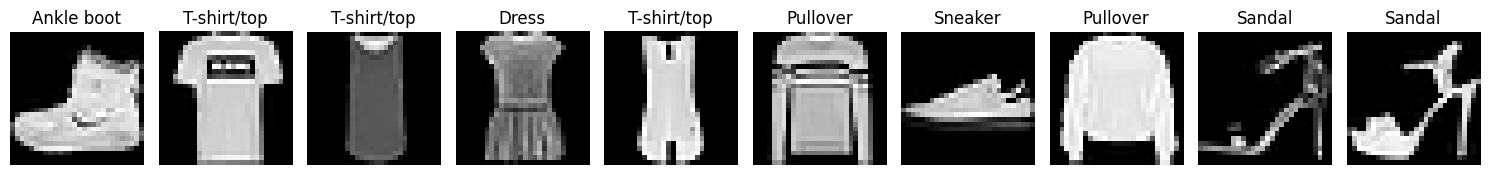

In [ ]:
# ------------------------------------------------------------
# 3. Visualize data samples
# ------------------------------------------------------------
def preview_images(images, labels, n=10):
    plt.figure(figsize=(15, 3))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_labels[labels[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

preview_images(x_train, y_train)


In [ ]:
# ------------------------------------------------------------
# 4. ANN model (Functional API)
# ------------------------------------------------------------
def build_ann_model(input_dim=784, hidden_units=[256, 128], dropout_rate=0.3):
    inputs = Input(shape=(input_dim,))
    x = layers.Dense(hidden_units[0], activation='relu')(inputs)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(hidden_units[1], activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    return Model(inputs, outputs, name='ANN')

ann_model = build_ann_model()
ann_model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann_model.summary()

Model: "ANN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ------------------------------------------------------------
# 5. CNN model (Functional API)
# ------------------------------------------------------------
def build_cnn_model(dropout_rate=0.5):
    inputs = Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    return Model(inputs, outputs, name='CNN')

cnn_model = build_cnn_model()
cnn_model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 390,410 (1.49 MB)

 Trainable params: 390,410 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ------------------------------------------------------------
# 6. Prepare datasets
# ------------------------------------------------------------
batch_size = 64
train_ann = tf.data.Dataset.from_tensor_slices((x_train.reshape(-1, 784), y_train)).shuffle(10000).batch(batch_size)
valid_ann = tf.data.Dataset.from_tensor_slices((x_valid.reshape(-1, 784), y_valid)).batch(batch_size)
test_ann = tf.data.Dataset.from_tensor_slices((x_test.reshape(-1, 784), y_test)).batch(batch_size)

train_cnn = tf.data.Dataset.from_tensor_slices((x_train[..., np.newaxis], y_train)).shuffle(10000).batch(batch_size)
valid_cnn = tf.data.Dataset.from_tensor_slices((x_valid[..., np.newaxis], y_valid)).batch(batch_size)
test_cnn = tf.data.Dataset.from_tensor_slices((x_test[..., np.newaxis], y_test)).batch(batch_size)


In [ ]:
# ------------------------------------------------------------
# 7. Train models
# ------------------------------------------------------------
print("\nTraining ANN...")
ann_history = ann_model.fit(train_ann, validation_data=valid_ann, epochs=5, verbose=2)

print("\nTraining CNN...")
cnn_history = cnn_model.fit(train_cnn, validation_data=valid_cnn, epochs=5, verbose=2)



Training ANN...
Epoch 1/5
375/375 - 6s - 16ms/step - accuracy: 0.7672 - loss: 0.6515 - val_accuracy: 0.8391 - val_loss: 0.4314
Epoch 2/5
375/375 - 4s - 9ms/step - accuracy: 0.8290 - loss: 0.4730 - val_accuracy: 0.8541 - val_loss: 0.3989
Epoch 3/5
375/375 - 5s - 13ms/step - accuracy: 0.8459 - loss: 0.4277 - val_accuracy: 0.8671 - val_loss: 0.3698
Epoch 4/5
375/375 - 4s - 10ms/step - accuracy: 0.8552 - loss: 0.3971 - val_accuracy: 0.8641 - val_loss: 0.3722
Epoch 5/5
375/375 - 5s - 14ms/step - accuracy: 0.8604 - loss: 0.3818 - val_accuracy: 0.8767 - val_loss: 0.3459

Training CNN...
Epoch 1/5
375/375 - 85s - 227ms/step - accuracy: 0.7823 - loss: 0.5984 - val_accuracy: 0.8684 - val_loss: 0.3606
Epoch 2/5
375/375 - 81s - 217ms/step - accuracy: 0.8729 - loss: 0.3546 - val_accuracy: 0.8892 - val_loss: 0.3051
Epoch 3/5
375/375 - 81s - 217ms/step - accuracy: 0.8919 - loss: 0.2994 - val_accuracy: 0.9069 - val_loss: 0.2640
Epoch 4/5
375/375 - 82s - 218ms/step - accuracy: 0.9030 - loss: 0.2657 - 

In [ ]:
# ------------------------------------------------------------
# 8. Evaluate on test set
# ------------------------------------------------------------
ann_eval = ann_model.evaluate(test_ann, verbose=0)
cnn_eval = cnn_model.evaluate(test_cnn, verbose=0)

print(f"\nANN Test Accuracy: {ann_eval[1]*100:.2f}%")
print(f"CNN Test Accuracy: {cnn_eval[1]*100:.2f}%")



ANN Test Accuracy: 86.77%
CNN Test Accuracy: 90.83%


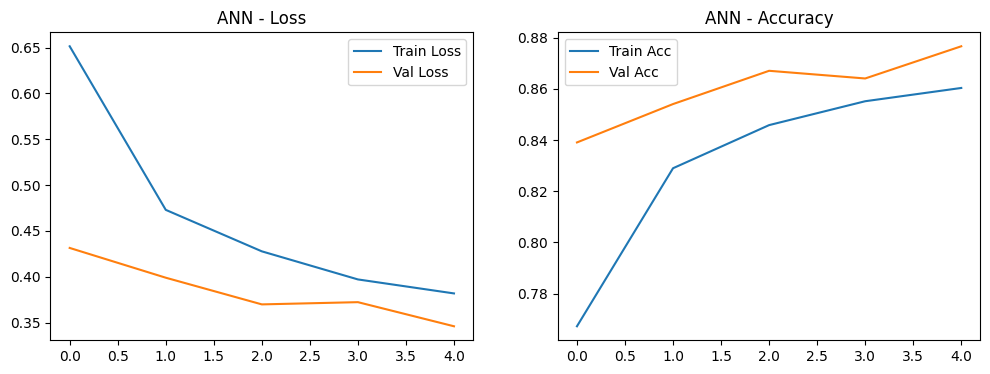

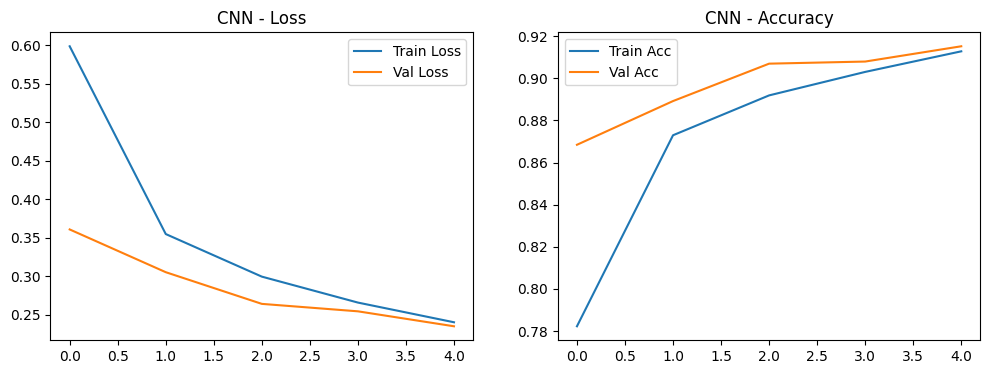

In [ ]:
# ------------------------------------------------------------
# 9. Plot loss and accuracy curves
# ------------------------------------------------------------
def plot_training(hist, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].plot(hist.history['loss'], label='Train Loss')
    axes[0].plot(hist.history['val_loss'], label='Val Loss')
    axes[0].set_title(f'{title} - Loss')
    axes[0].legend()

    axes[1].plot(hist.history['accuracy'], label='Train Acc')
    axes[1].plot(hist.history['val_accuracy'], label='Val Acc')
    axes[1].set_title(f'{title} - Accuracy')
    axes[1].legend()
    plt.show()

plot_training(ann_history, "ANN")
plot_training(cnn_history, "CNN")


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step


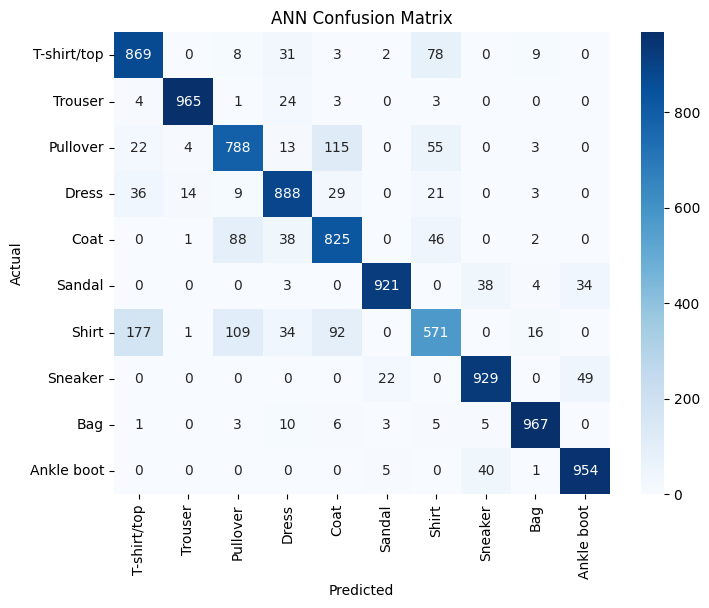

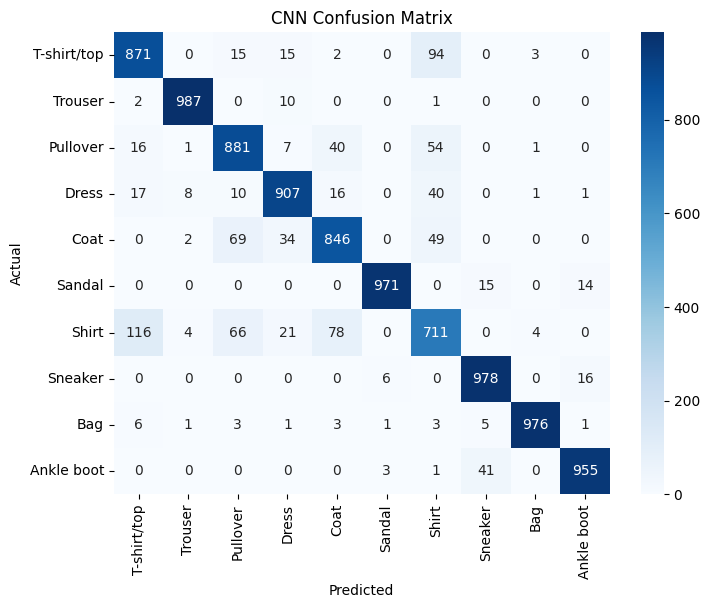

In [ ]:
# ------------------------------------------------------------
# 10. Confusion matrices
# ------------------------------------------------------------
def get_predictions(model, dataset):
    preds = model.predict(dataset)
    return np.argmax(preds, axis=1)

y_pred_ann = get_predictions(ann_model, test_ann)
y_pred_cnn = get_predictions(cnn_model, test_cnn)

def plot_conf_mat(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return cm

ann_cm = plot_conf_mat(y_test, y_pred_ann, "ANN")
cnn_cm = plot_conf_mat(y_test, y_pred_cnn, "CNN")

In [ ]:
# ------------------------------------------------------------
# 11. Analyze confusion between similar classes
# ------------------------------------------------------------
def analyze_confusion(cm, model_name):
    print(f"\n{model_name} - Common Class Confusions:")
    print(f"Shirt vs Coat: {cm[6,4] + cm[4,6]}")
    print(f"Shirt vs Pullover: {cm[6,2] + cm[2,6]}")
    print(f"Coat vs Pullover: {cm[4,2] + cm[2,4]}")
    print(f"T-shirt/top vs Shirt: {cm[0,6] + cm[6,0]}")
    print(f"Sandal vs Sneaker: {cm[5,7] + cm[7,5]}")
    print(f"Sneaker vs Ankle boot: {cm[7,9] + cm[9,7]}")

analyze_confusion(ann_cm, "ANN")
analyze_confusion(cnn_cm, "CNN")


ANN - Common Class Confusions:
Shirt vs Coat: 138
Shirt vs Pullover: 164
Coat vs Pullover: 203
T-shirt/top vs Shirt: 255
Sandal vs Sneaker: 60
Sneaker vs Ankle boot: 89

CNN - Common Class Confusions:
Shirt vs Coat: 127
Shirt vs Pullover: 120
Coat vs Pullover: 109
T-shirt/top vs Shirt: 210
Sandal vs Sneaker: 21
Sneaker vs Ankle boot: 57


In [ ]:
# ------------------------------------------------------------
# 12. Final performance comparison
# ------------------------------------------------------------
print("=" * 80)
print("PERFORMANCE COMPARISON AND ANALYSIS")
print("=" * 80)
print(f"\nANN Accuracy: {ann_eval[1]*100:.2f}%")
print(f"CNN Accuracy: {cnn_eval[1]*100:.2f}%")
print(f"CNN outperforms ANN by: {(cnn_eval[1]-ann_eval[1])*100:.2f}%")
print("=" * 80)

PERFORMANCE COMPARISON AND ANALYSIS

ANN Accuracy: 86.77%
CNN Accuracy: 90.83%
CNN outperforms ANN by: 4.06%


In [ ]:
# ============================================================
# IMAT5235 / CSIP5103 Coursework
# Fashion-MNIST Classification – Enhanced PyTorch Implementation
# (Alternative, Modular, and Refactored Version)
# ============================================================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ------------------------------------------------------------
# 1. Configuration and Environment Setup
# ------------------------------------------------------------
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on: {device}")

BATCH_SIZE = 128
NUM_EPOCHS = 5
LR = 0.001
WEIGHT_DECAY = 1e-4
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Running on: cpu


In [ ]:
# ------------------------------------------------------------
# 2. Data Preparation and Augmentation
# ------------------------------------------------------------
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = torchvision.datasets.FashionMNIST('./data', train=True, download=True, transform=train_transform)
test_data = torchvision.datasets.FashionMNIST('./data', train=False, download=True, transform=test_transform)

# Create validation split
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_dataset, val_dataset = random_split(train_data, [train_size, val_size])
val_dataset.dataset.transform = test_transform  # remove augmentation

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"Dataset sizes — Train: {len(train_dataset)}, Val: {len(val_dataset)}, Test: {len(test_data)}")


Dataset sizes — Train: 48000, Val: 12000, Test: 10000


Sample Augmented Images:


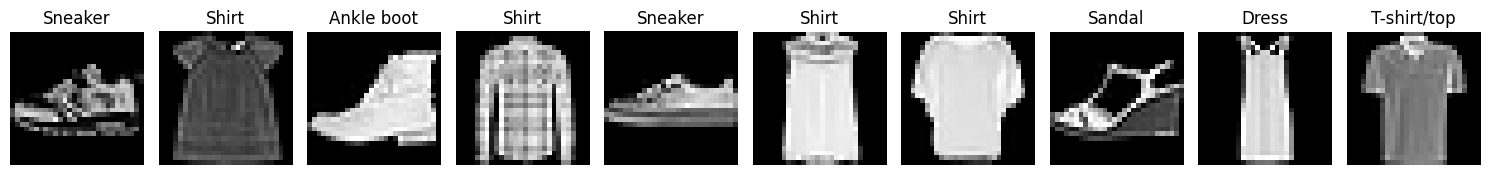

In [ ]:
# ------------------------------------------------------------
# 3. Visualization Utility
# ------------------------------------------------------------
def preview_images(loader, n=10):
    images, labels = next(iter(loader))
    fig, axes = plt.subplots(1, n, figsize=(15, 3))
    for i in range(n):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(CLASS_NAMES[labels[i].item()])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

print("Sample Augmented Images:")
preview_images(train_loader)

In [ ]:
# ------------------------------------------------------------
# 4. Model Architectures
# ------------------------------------------------------------
class ANNModel(nn.Module):
    def __init__(self, input_size=784, hidden=512, num_classes=10):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, hidden),
            nn.BatchNorm1d(hidden),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(hidden, hidden // 2),
            nn.BatchNorm1d(hidden // 2),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(hidden // 2, hidden // 4),
            nn.BatchNorm1d(hidden // 4),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(hidden // 4, num_classes)
        )

    def forward(self, x):
        return self.layers(x)

class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            self._conv_block(1, 32),
            self._conv_block(32, 64),
            self._conv_block(64, 128),
            self._conv_block(128, 256)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 1 * 1, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(256, num_classes)
        )

    def _conv_block(self, in_ch, out_ch):
        return nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25)
        )

    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)

# Initialize models
ann = ANNModel().to(device)
cnn = CNNModel().to(device)

print("\nEnhanced ANN Summary:\n", ann)
print("\nEnhanced CNN Summary:\n", cnn)


Enhanced ANN Summary:
 ANNModel(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Dropout(p=0.4, inplace=False)
    (5): Linear(in_features=512, out_features=256, bias=True)
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): Dropout(p=0.4, inplace=False)
    (9): Linear(in_features=256, out_features=128, bias=True)
    (10): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Dropout(p=0.3, inplace=False)
    (13): Linear(in_features=128, out_features=10, bias=True)
  )
)

Enhanced CNN Summary:
 CNNModel(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1,

In [ ]:
# ------------------------------------------------------------
# 5. Training Function
# ------------------------------------------------------------
def train_model(model, train_loader, val_loader, name):
    optimizer = optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS)
    criterion = nn.CrossEntropyLoss()

    best_acc = 0
    train_accs, val_accs, train_losses, val_losses = [], [], [], []

    for epoch in range(NUM_EPOCHS):
        model.train()
        total, correct, running_loss = 0, 0, 0

        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, pred = outputs.max(1)
            total += y.size(0)
            correct += pred.eq(y).sum().item()

        train_acc = 100 * correct / total
        train_loss = running_loss / len(train_loader)

        # Validation
        model.eval()
        val_correct, val_total, val_loss = 0, 0, 0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                out = model(x)
                loss = criterion(out, y)
                val_loss += loss.item()
                _, pred = out.max(1)
                val_total += y.size(0)
                val_correct += pred.eq(y).sum().item()

        val_acc = 100 * val_correct / val_total
        val_loss /= len(val_loader)
        scheduler.step()

        if val_acc > best_acc:
            best_acc = val_acc
            best_state = model.state_dict().copy()

        train_accs.append(train_acc)
        val_accs.append(val_acc)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"[{name}] Epoch {epoch+1}/{NUM_EPOCHS} | "
              f"Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}% | "
              f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    model.load_state_dict(best_state)
    print(f"Best {name} Validation Accuracy: {best_acc:.2f}%\n")

    return train_losses, val_losses, train_accs, val_accs, best_acc


In [ ]:
# ------------------------------------------------------------
# 6. Train Both Models
# ------------------------------------------------------------
print("\nTraining Enhanced ANN...")
ann_train_loss, ann_val_loss, ann_train_acc, ann_val_acc, ann_best = train_model(ann, train_loader, val_loader, "ANN")

print("\nTraining Enhanced CNN...")
cnn_train_loss, cnn_val_loss, cnn_train_acc, cnn_val_acc, cnn_best = train_model(cnn, train_loader, val_loader, "CNN")



Training Enhanced ANN...
[ANN] Epoch 1/5 | Train Acc: 79.60% | Val Acc: 85.92% | Train Loss: 0.6026 | Val Loss: 0.3970
[ANN] Epoch 2/5 | Train Acc: 84.92% | Val Acc: 86.82% | Train Loss: 0.4244 | Val Loss: 0.3635
[ANN] Epoch 3/5 | Train Acc: 86.21% | Val Acc: 87.63% | Train Loss: 0.3819 | Val Loss: 0.3369
[ANN] Epoch 4/5 | Train Acc: 87.58% | Val Acc: 88.50% | Train Loss: 0.3421 | Val Loss: 0.3158
[ANN] Epoch 5/5 | Train Acc: 88.54% | Val Acc: 88.86% | Train Loss: 0.3191 | Val Loss: 0.3077
Best ANN Validation Accuracy: 88.86%


Training Enhanced CNN...
[CNN] Epoch 1/5 | Train Acc: 75.80% | Val Acc: 85.54% | Train Loss: 0.6768 | Val Loss: 0.3934
[CNN] Epoch 2/5 | Train Acc: 85.55% | Val Acc: 88.97% | Train Loss: 0.4089 | Val Loss: 0.3049
[CNN] Epoch 3/5 | Train Acc: 87.44% | Val Acc: 89.73% | Train Loss: 0.3560 | Val Loss: 0.2800
[CNN] Epoch 4/5 | Train Acc: 88.66% | Val Acc: 90.48% | Train Loss: 0.3163 | Val Loss: 0.2642
[CNN] Epoch 5/5 | Train Acc: 89.51% | Val Acc: 90.83% | Train Lo

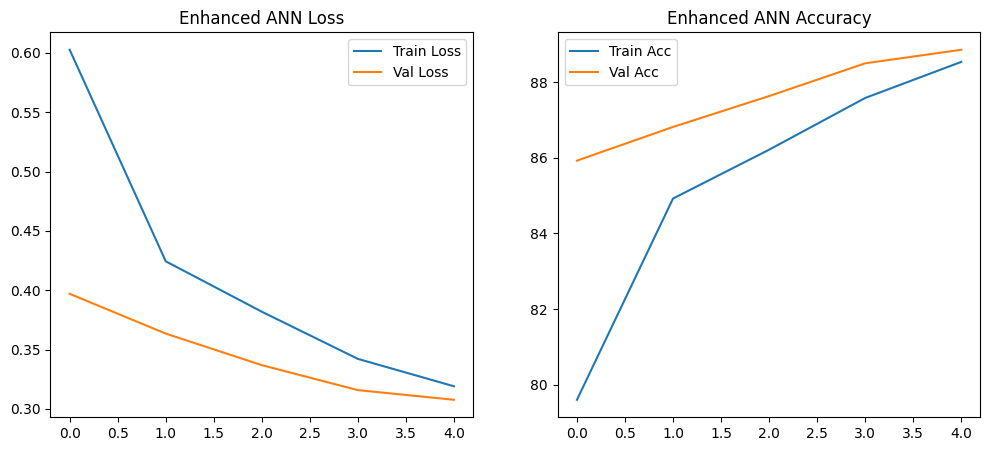

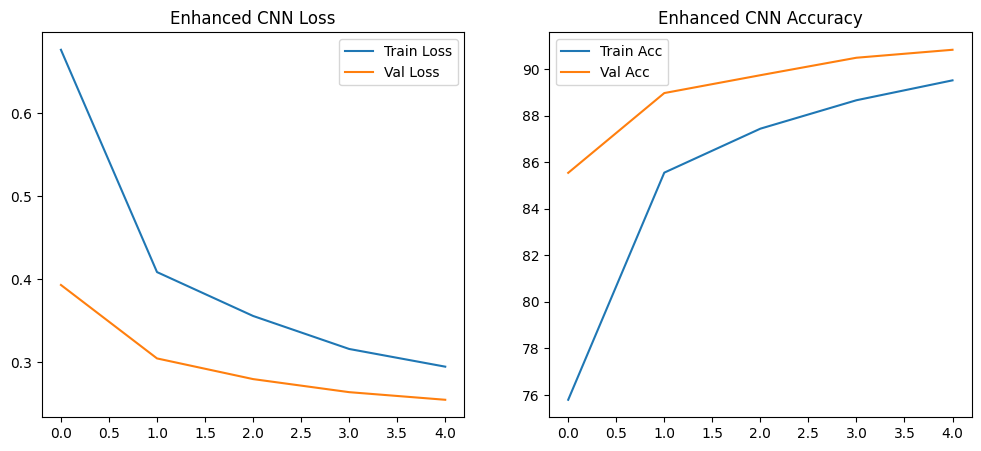

In [ ]:
# ------------------------------------------------------------
# 7. Plot Training History
# ------------------------------------------------------------
def plot_curves(train_loss, val_loss, train_acc, val_acc, title):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].plot(train_loss, label='Train Loss')
    ax[0].plot(val_loss, label='Val Loss')
    ax[0].set_title(f'{title} Loss')
    ax[0].legend()

    ax[1].plot(train_acc, label='Train Acc')
    ax[1].plot(val_acc, label='Val Acc')
    ax[1].set_title(f'{title} Accuracy')
    ax[1].legend()
    plt.show()

plot_curves(ann_train_loss, ann_val_loss, ann_train_acc, ann_val_acc, "Enhanced ANN")
plot_curves(cnn_train_loss, cnn_val_loss, cnn_train_acc, cnn_val_acc, "Enhanced CNN")


Enhanced ANN Test Accuracy: 87.97%
Enhanced CNN Test Accuracy: 90.60%


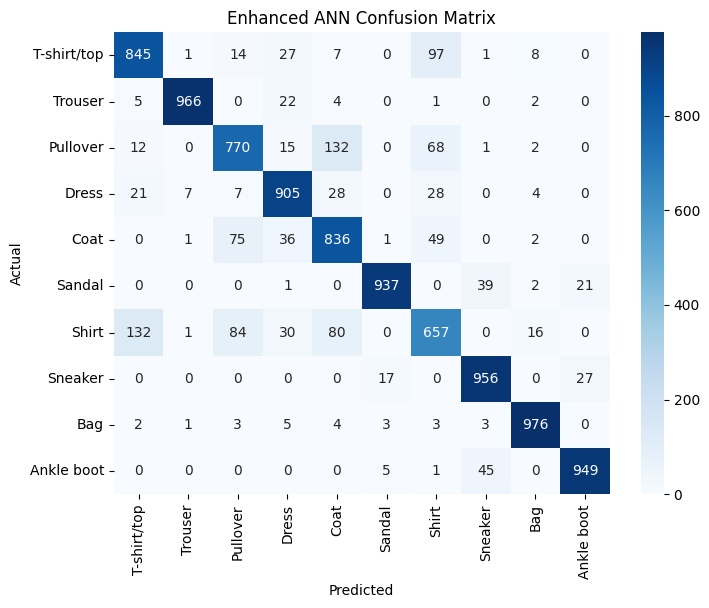

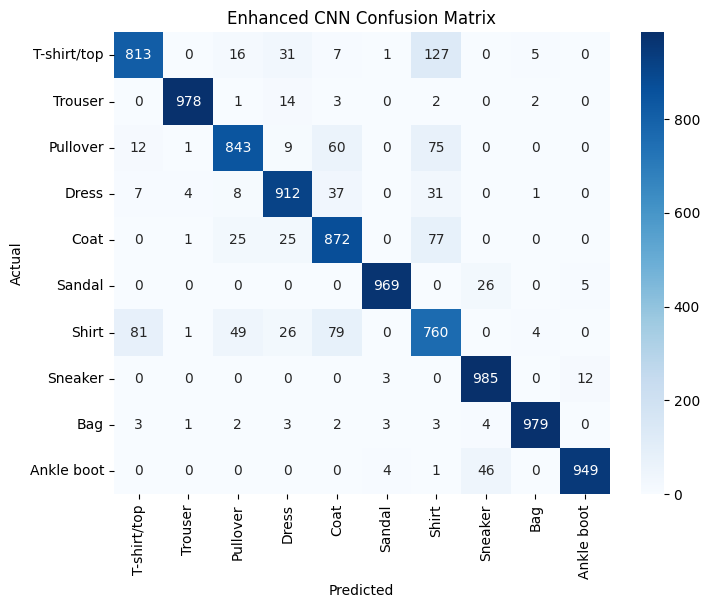

In [ ]:
# ------------------------------------------------------------
# 8. Evaluation and Confusion Matrix
# ------------------------------------------------------------
def evaluate(model, loader, name):
    model.eval()
    preds, labels = [], []
    loss_fn = nn.CrossEntropyLoss()
    test_loss, correct = 0, 0

    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            loss = loss_fn(out, y)
            test_loss += loss.item()
            _, pred = out.max(1)
            preds.extend(pred.cpu().numpy())
            labels.extend(y.cpu().numpy())
            correct += pred.eq(y).sum().item()

    acc = 100 * correct / len(loader.dataset)
    print(f"{name} Test Accuracy: {acc:.2f}%")
    return np.array(labels), np.array(preds), acc

ann_y, ann_pred, ann_acc = evaluate(ann, test_loader, "Enhanced ANN")
cnn_y, cnn_pred, cnn_acc = evaluate(cnn, test_loader, "Enhanced CNN")

# Confusion Matrices
def plot_confusion(cm, name):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

ann_cm = confusion_matrix(ann_y, ann_pred)
cnn_cm = confusion_matrix(cnn_y, cnn_pred)

plot_confusion(ann_cm, "Enhanced ANN")
plot_confusion(cnn_cm, "Enhanced CNN")



In [ ]:
# ------------------------------------------------------------
# 9. Confusion Analysis (Visually Similar Classes)
# ------------------------------------------------------------
def analyze_confusions(cm, model_name):
    print(f"\n{model_name} - Key Confusions:")
    pairs = [("Shirt", "Pullover"), ("Shirt", "Coat"),
             ("T-shirt/top", "Shirt"), ("Sandal", "Sneaker"),
             ("Sneaker", "Ankle boot")]
    for a, b in pairs:
        i, j = CLASS_NAMES.index(a), CLASS_NAMES.index(b)
        total_conf = cm[i, j] + cm[j, i]
        print(f"  {a:12s} ↔ {b:12s}: {total_conf} samples")

analyze_confusions(ann_cm, "Enhanced ANN")
analyze_confusions(cnn_cm, "Enhanced CNN")



Enhanced ANN - Key Confusions:
  Shirt        ↔ Pullover    : 152 samples
  Shirt        ↔ Coat        : 129 samples
  T-shirt/top  ↔ Shirt       : 229 samples
  Sandal       ↔ Sneaker     : 56 samples
  Sneaker      ↔ Ankle boot  : 72 samples

Enhanced CNN - Key Confusions:
  Shirt        ↔ Pullover    : 124 samples
  Shirt        ↔ Coat        : 156 samples
  T-shirt/top  ↔ Shirt       : 208 samples
  Sandal       ↔ Sneaker     : 29 samples
  Sneaker      ↔ Ankle boot  : 58 samples


In [ ]:
# ------------------------------------------------------------
# 10. Performance Comparison
# ------------------------------------------------------------
print("\n" + "="*70)
print("ENHANCED MODEL PERFORMANCE COMPARISON")
print("="*70)
print(f"Enhanced ANN Accuracy: {ann_acc:.2f}%")
print(f"Enhanced CNN Accuracy: {cnn_acc:.2f}%")
print(f"CNN outperforms ANN by: {cnn_acc - ann_acc:.2f}%")
print("="*70)


ENHANCED MODEL PERFORMANCE COMPARISON
Enhanced ANN Accuracy: 87.97%
Enhanced CNN Accuracy: 90.60%
CNN outperforms ANN by: 2.63%
